<h1>Tarea semanal 6</h1>

<h3> Consignas </h3>

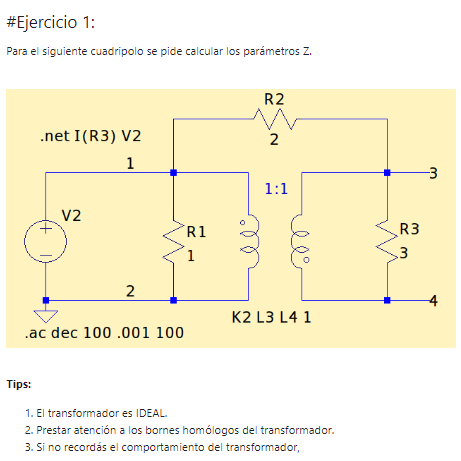

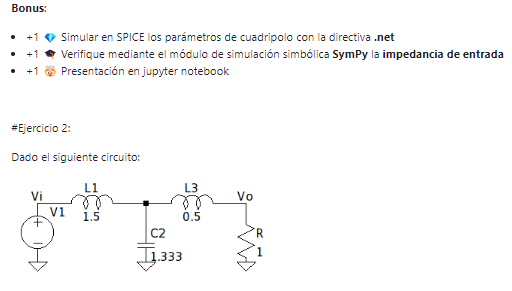

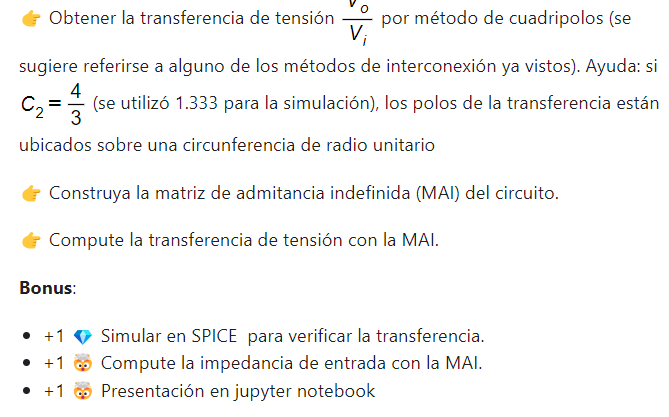

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


In [4]:
import sympy as sp

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex
   

YL1, YL2, YL3, YC2= sp.symbols('YL1 YL2 YL3 YC2', complex=True)
G = sp.symbols('G', real=True, positive=True)

# Armo la MAI

#               Nodos: 0         1            2         3
Ymai = sp.Matrix([  
                    [ YL1,      -YL1,          0,       0      ],
                    [ -YL1,  YL1+YL3+YC2,    -YL3,    -YC2     ],
                    [   0,       -YL3,       YL3+G,    -G      ],
                    [   0,       -YC2,        -G,      YC2 + G ]
                 ])

# con_detalles = False
con_detalles = True

# Calculo la Z en el puerto de entrada a partir de la MAI
Zmai = calc_MAI_impedance_ij(Ymai, 0, 1, verbose=con_detalles)

# Aplico la condición de R constante
print('si consideramos:')
print_latex( r'G^2 = Y_a . Y_b' )
print('entonces')
print_latex( r'Z_{{ {:d}{:d} }} = '.format(0,1) +  sp.latex(Zmai.subs(Ya*Yb, G**2)) )

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 3, 1, 0, 1, verbose=con_detalles)
Vmai = sp.simplify(Vmai.subs(Ya*Yb, G**2))
Vmai_Ya = sp.simplify(Vmai.subs(Yb, G**2/Ya))
Vmai_Yb = sp.simplify(Vmai.subs(Ya, G**2/Yb))

print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(3, 1, 0, 1) +  sp.latex(Vmai_Ya) + ' = ' + sp.latex(Vmai_Yb) )

print('Transimpedancia:')
Zmai = calc_MAI_ztransf_ij_mn(Ymai, 3, 1, 0, 1, verbose=con_detalles)
Zmai = sp.simplify(Zmai.subs(Ya*Yb, G**2))
Zmai_Ya = sp.simplify(Zmai.subs(Yb, G**2/Ya))
Zmai_Yb = sp.simplify(Zmai.subs(Ya, G**2/Yb))
print_latex( r'Z^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(3, 1, 0, 1) + sp.latex(Zmai_Ya) + ' = ' + sp.latex(Zmai_Yb) )



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

si consideramos:


<IPython.core.display.Math object>

entonces


<IPython.core.display.Math object>

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transimpedancia:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>